In [1]:
from collections import defaultdict 
import pydot
import statistics
import os
import sys
import csv
import random
import time
from datetime import datetime 
from collections import Counter
import seaborn as sns
from IPython.display import Image, display
from matplotlib import pyplot as plt


In [2]:
path = "/home/achilleas/Desktop/thesis/DATASET F1/Fold_1/20%_test"
pathB = "/home/achilleas/Desktop/thesis/DATASET F1/specimen_benign/20%_test"
pathT = "/home/achilleas/Desktop/thesis/DATASET F1/Fold_1/80%_train"

# filename = "default_G_tone_UNIQUES_map"
filename = "default_G_tone_map"
# filename = "CVGB"
grgFilename = "default_G'"
mapFilename = "default_unique_mapping"
rootDir = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith(filename+".csv")]
rootDir.sort()
benignDir = [os.path.join(root, name)
             for root, dirs, files in os.walk(pathB)
             for name in files
             if name.endswith(filename+".csv")]
benignDir.sort()
trainDir = [os.path.join(root, name)
             for root, dirs, files in os.walk(pathT)
             for name in files
             if name.endswith(filename+".csv")]
trainDir.sort()

grgDir = [os.path.join(root,name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith(grgFilename+".txt")]


In [3]:
classes = {"ACCESS_MASK":0,"Atom":1,"BOOLEAN":2,"Debug":3,"Device":4,
                                 "Environment":5,"File":6,"HANDLE":7,"Job":8,"LONG":9,"LPC":10,
                                 "Memory":11,"NTSTATUS":12,"Object":13,"Other":14,"PHANDLE":15,
                                 "PLARGE_INTEGER":16,"Process":17,"PUNICODE_STRING":18,
                                 "PULONG":19,"PULARGE_INTEGER":20,"PVOID_SIZEAFTER":21,
                                 "PWSTR":22,"Registry":23,"Security":24,"Synchronization":25,
                                 "Time":26,"Transaction":27,"ULONG":28,"WOW64":29, "DummyStart":30,"DummyEnd":31}

In [4]:
# Python program for implementation of Ford Fulkerson algorithm 


#This class represents a directed graph using adjacency matrix representation 
class Graph: 

    def __init__(self,graph): 
        self.graph = graph # residual graph 
        self. ROW = len(graph) 
        #self.COL = len(gr[0]) 
        

    '''Returns true if there is a path from source 's' to sink 't' in 
    residual graph. Also fills parent[] to store the path '''
    
    def isReachable(self, s, d):
        # Mark all the vertices as not visited 
        visited =[False]*(self.ROW) 
        # Create a queue for BFS 
        queue=[] 
        
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[s] = True

        while queue:
            #Dequeue a vertex from queue  
            n = queue.pop(0) 
            
            # If this adjacent node is the destination node, 
            # then return true 
            if n == d: 
                return True

            #  Else, continue to do BFS 
            
            for ind, val in enumerate(self.graph[n]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
        # If BFS is complete without visited d 
        return False
        
    def BFS(self,s, t, parent): 
        
        # Mark all the vertices as not visited 
        visited =[False]*(self.ROW) 
        
        # Create a queue for BFS 
        queue=[] 
        
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[s] = True
        
        # Standard BFS Loop 
        while queue: 

            #Dequeue a vertex from queue and print it 
            u = queue.pop(0) 

            # Get all adjacent vertices of the dequeued vertex u 
            # If a adjacent has not been visited, then mark it 
            # visited and enqueue it 
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 
        # If we reached sink in BFS starting from source, then return 
        # true, else false 
        return True if visited[t] else False


    # Returns tne maximum flow from s to t in the given graph 
    def FordFulkerson(self, source, sink): 
        # This array is filled by BFS and to store path 
        parent = [-1]*(self.ROW) 

        max_flow = 0 # There is no flow initially 

        if not self.isReachable(source,sink):
            return 0
        # Augment the flow while there is path from source to sink 
        while self.BFS(source, sink, parent) : 

            # Find minimum residual capacity of the edges along the 
            # path filled by BFS. Or we can say find the maximum flow 
            # through the path found. 
            path_flow = float("Inf") 
            s = sink 
            while(s != source): 
                path_flow = min (path_flow, self.graph[parent[s]][s]) 
                s = parent[s] 
            # Add path flow to overall flow 
            max_flow += path_flow 

            # update residual capacities of the edges and reverse edges 
            # along the path 
            v = sink 
            while(v != source): 
                u = parent[v] 
                self.graph[u][v] -= path_flow 
                self.graph[v][u] += path_flow 
                v = parent[v] 
#         print ("max flow is: "+str(max_flow))
        return max_flow


# # Create a graph given in the above diagram 

# graph = [[0, 16, 13, 0, 0, 0], 
# 		[0, 0, 10, 12, 0, 0], 
# 		[0, 4, 0, 0, 14, 0], 
# 		[0, 0, 9, 0, 0, 20], 
# 		[0, 0, 0, 7, 0, 4], 
# 		[0, 0, 0, 0, 0, 0]] 

# g = Graph(graph) 

# source = 0; sink = 5

# print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink)) 

# #This code is contributed by Neelam Yadav 


In [5]:
def Bfs(C, F, s, t):  # C is the capacity matrix
    n = len(C)
    queue = []
    queue.append(s)
    global level
    level = n * [0]  # initialization
    level[s] = 1  
    while queue:
        k = queue.pop(0)
        for i in range(n):
                if (F[k][i] < C[k][i]) and (level[i] == 0): # not visited
                        level[i] = level[k] + 1
                        queue.append(i)
    return level[t] > 0

In [6]:
def Dfs(C, F, k, cp):
    tmp = cp
    if k == len(C)-1:
        return cp
    for i in range(len(C)):
        if (level[i] == level[k] + 1) and (F[k][i] < C[k][i]):
            f = Dfs(C,F,i,min(tmp,C[k][i] - F[k][i]))
            F[k][i] = F[k][i] + f
            F[i][k] = F[i][k] - f
            tmp = tmp - f
    return cp - tmp

In [7]:
def MaxFlow(C,s,t):
    n = len(C)
    F = [n*[0] for i in range(n)] # F is the flow matrix
    flow = 0
    while(Bfs(C,F,s,t)):
           flow = flow + Dfs(C,F,s,100000)
    return flow

In [8]:
def getSourceSink(path):
    verteces = []
    with open(path) as fp:
        line = fp.readline()
        while line:
            verteces.append(line.split(","))
            line = fp.readline()
    return [verteces[0][0],verteces[-1][1].strip()]

In [9]:
def getArray (path):
    results = []
    with open(path) as csvfile:
        reader = csv.reader(csvfile,csv.QUOTE_NONNUMERIC) # change contents to floats
        for row in reader: # each row is a list
            nums = []
            for i in row: 
                if i :
                    nums.append(int(i))
            results.append(nums)
    return results

In [10]:
def createExtendedG(g):
    parents = []
    children = []
    for i in range(len(g)):
        for j in range(len(g[i])):
            if g[i][j]!=0:
                break
            else:
                children.append(i)
    for i in range(len(g)):
        for j in range(len(g[i])):
            if g[j][i]!=0:
                break
            else:
                parents.append(i)
                
    for i in range(len(g)):
        g[i].append(0)
        g[i].append(0)
    leng= len(g)
    g.append([0 for i in range (leng+2)])
    g.append([0 for i in range (leng+2)])
    
    for i in children :
        g[i][-1] = 1
    for j in parents:
        g[-2][j]=1
    return g

In [11]:
def createImage(g,path):
    G = pydot.Dot(graph_type='digraph')
    for i in range(len(g)):
        x = pydot.Node(i)
        for j in range(len(g[i])):
            if g[i][j]!= 0 :
                y = pydot.Node(j)
                e = pydot.Edge(i,j)
                G.add_edge(e)
                
    im = Image(G.create_png())
    G.write_png(path)
    display(im)             

In [12]:
def findMaxOutDegreeVertex(g):
    outDegrees={}
    return_matrix = []
    for i in range(len(g)):
        for j in range(len(g[i])):
            if g[i][j]!=0:
                if i not in outDegrees:
                    outDegrees[i]=[g[i][j],1]
                else: 
                    weight = outDegrees[i][0]+g[i][j]
                    cardinality = outDegrees[i][1]+1
                    outDegrees[i]=[weight,cardinality]
    return outDegrees
    

In [13]:
def findMaxInDegreeVertex(g):
    inDegrees= {}
    return_matrix = []
    for i in range (len(g)):
        for j in range(len(g[i])):
            if g[j][i]!=0:
                if i not in inDegrees:
                    inDegrees[i] = [g[j][i],1]
                else: 
                    weight = inDegrees[i][0]+g[j][i]
                    cardinality = inDegrees[i][1]+1
                    inDegrees[i]=[weight,cardinality]
                    
    return inDegrees    


In [14]:
def createCoverageGraph(g):
    cvg = []
    combinedDegrees = {}
    inDegrees = findMaxInDegreeVertex(g)
    inKeys =list(inDegrees.keys())
    outDegrees = findMaxOutDegreeVertex(g)
    outKeys =list(outDegrees.keys())
    combinedDegrees= outDegrees.copy()
    for i in inKeys:
        if i in outDegrees:
            combinedDegrees[i] = [inDegrees[i][0]+outDegrees[i][0], inDegrees[i][1]+outDegrees[i][1]]
        else : 
            combinedDegrees[i] = inDegrees[i]
    sortedcDegrees = sorted(combinedDegrees.items(), key = lambda kv:kv[0])     
    cKeys = [i[0] for i in sortedcDegrees]
    for i in range(30):
        row = [0 for k in range(30)]
        if i not in cKeys:
            cvg.append(row)
            continue
        weight = combinedDegrees[i][0]
        cardinality = combinedDegrees[i][1]
        for j in cKeys:
            if weight > combinedDegrees[j][0] and cardinality > combinedDegrees[j][1]:
                row[j] = 1
        cvg.append(row)
        

    return cvg
    

# def writeCSV()
generic method to quickly write a graph to a csv file.

In [15]:
def writeCSV(g,path,name):
    path_spl = path.split('/')
    path_spl[-1] = name
    sp_path = '/'.join(path_spl)
    with open(sp_path, mode='w') as cvg_file:
        cvg_writer = csv.writer(cvg_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for i in g:
            cvg_writer.writerow(i)

# def executeTrial ()
## here we call the max Flow algorithm 
### Max flow in GRG
* if we get the source and the sink from the default G' the algorithm stops in cases of first caller X and last called X function.
* if we get the source and the sink from the default G_tone_cardinality tests show that nothing stops the algorithm as in all cases the first caller is different than the last called

### Max flow in CVG
* the algorithm works fine.


In [16]:
def executeTrial(path):
    sp_path = path.split('/')
    family = sp_path[-3]
    write_path = '/'.join(sp_path)
#     graph = createExtendedG(createCoverageGraph(getArray(path)))
    graph = getArray(path)
#     for i in range(len(graph)):
#         for j in range(len(graph[i])):
#             if graph[i][j]!=0:
#                 graph[i][j] =1
#     g = Graph(createExtendedG(createCoverageGraph(graph)))
    sp_path[-1]= "default_G_tone_cardinality.txt"
#     source = 30
#     sink = 31
    source = classes[getSourceSink('/'.join(sp_path))[0]]
    sink = classes[getSourceSink('/'.join(sp_path))[1]]
#     print("source %d sink %d"%(source,sink))
    fG = Graph(graph).FordFulkerson(source,sink)
#     fG = MaxFlow(graph,source,sink)
    return [fG, family]

# def experiment()
wrapper method to execute and calculate median max flow for each member of our dataset
## median
we prefer median values of the flows because they are more robust to individual extreme flows

In [19]:
def experiment(dirs):
#     print(len(dirs))
    max_flow_vals={}
    mean_max_flow={}
    mean_flows = []
    total_values = []
    for i in dirs:
        values= executeTrial(i)
        total_values.append(values[0])
        if values[1] in max_flow_vals:
            max_flow_vals[values[1]].append(values[0])
        else : 
            max_flow_vals[values[1]]= [values[0]]

    for i in max_flow_vals:
        mean_max_flow[i] = statistics.median(max_flow_vals[i])
    for i in mean_max_flow :
        mean_flows.append(mean_max_flow[i])
        
    return mean_max_flow

# main body 
here we make separate calls in our functions to test the validity of the above methods

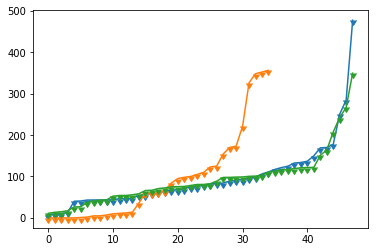

<Figure size 432x288 with 0 Axes>

In [20]:
root_flows = experiment(rootDir)
benign_flows = experiment(benignDir)
train_flows = experiment(trainDir)
# mal_corners = [min(root_flows), max(root_flows)]
# benign_corners = [min(benign_flows), max(benign_flows)]


# print("mal_corners:")
# print(mal_corners)
# print("benign_corners:")
# print(benign_corners)

sort_root = sorted(root_flows.items(), key = lambda kv:kv[1])
sort_benign = sorted(benign_flows.items(), key = lambda kv:kv[1])
sort_train = sorted(train_flows.items(), key = lambda kv:kv[1])

# print()

sort_root_vals = [i[1] for i in sort_root]
sort_benign_vals = [i[1] for i in sort_benign]
sort_train_vals = [i[1] for i in sort_train]


sort_root_names = [i[0] for i in sort_root]
sort_benign_names = [i[0] for i in sort_benign]
sort_train_names = [i[0] for i in sort_train]


sorted_root_flows = sorted(root_flows)
sorted_benign_flows= sorted(benign_flows)



# bCount =sorted(Counter(benign_flows).items(),key = lambda kv:kv[0])
# mCount = sorted(Counter(root_flows).items(),key = lambda kv:kv[0])



# --------------------------------------------
lists = [sort_root_vals, sort_benign_vals,sort_train_vals]
names = [sort_root_names, sort_benign_names, sort_train_names]

for i in lists:
    plt.plot(i,marker=11)
fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('maxFlow.png')
#---------------------------------------------------
# executeTrial(rootDir[0])
# ar = [[0,1,1,1,1],
#       [0,0,0,1,1],
#       [0,0,0,1,1],
#       [0,0,0,0,1],
#       [0,0,0,0,0]]
# createExtendedG(ar)
# cvg = createCoverageGraph(getArray(rootDir[0]),rootDir[0])

# for i in rootDir:
#     writeCSV(createExtendedG(createCoverageGraph(getArray(i))),i, 'CVGB.csv')
# for i in cvg:
#     print(i)
# g = createExtendedG(ar)
# G = pydot.Dot(graph_type='digraph')
# for i in range(len(g)):
#     x = pydot.Node(i)
#     for j in range(len(g[i])):
#         if g[i][j]!= 0 :
#             y = pydot.Node(j)
#             e = pydot.Edge(i,j)
#             G.add_edge(e)
                
# im = Image(G.create_png())
# display(im)             